# Métricas de Classificação

In [1]:
%matplotlib inline
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
y = ['dog', 'dog', 'dog', 'dog', 'dog', 'dog',
    'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',      
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']

In [3]:
y_pred = ['dog', 'dog', 'dog', 'rabbit', 'cat', 'cat',
     'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 
     'dog', 'dog', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']

In [4]:
cm = metrics.confusion_matrix(y, y_pred, labels=['cat', 'dog', 'rabbit'])
print(cm)

[[ 5  3  0]
 [ 2  3  1]
 [ 0  2 11]]


## Accuracy

In [5]:
metrics.accuracy_score(y, y_pred)

0.7037037037037037

In [6]:
accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
print(accuracy)

0.7037037037037037


## Precision

In [7]:
metrics.precision_score(y, y_pred, average=None)

array([0.71428571, 0.375     , 0.91666667])

### P = TP / (TP + FP) 

In [8]:
5 / (5 + 2 + 0)

0.7142857142857143

In [9]:
for c in range(cm.shape[0]):
    print(cm[c,c] / np.sum(cm[:, c]))

0.7142857142857143
0.375
0.9166666666666666


## Recall

In [10]:
metrics.recall_score(y, y_pred, average=None)

array([0.625     , 0.5       , 0.84615385])

### R = TP / (TP + FN) 

In [11]:
5 / (5 + 3 + 0)

0.625

In [12]:
for l in range(cm.shape[0]):
    print(cm[l,l] / np.sum(cm[l, :]))

0.625
0.5
0.8461538461538461


In [13]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

         cat       0.71      0.62      0.67         8
         dog       0.38      0.50      0.43         6
      rabbit       0.92      0.85      0.88        13

   micro avg       0.70      0.70      0.70        27
   macro avg       0.67      0.66      0.66        27
weighted avg       0.74      0.70      0.72        27



## Log Loss

In [14]:
y = np.array(["dog", "rabbit", "cat", "cat"])

# consideremos as probabilidades s seguir nessa ordem: ['cat' 'dog' 'rabbit']
y_score = np.array([[0.1, 0.8, 0.1], [0.1, 0.3, 0.6], [0.1, 0.7 , 0.2], [0.9, 0.05, 0.05]])

### y_pred -> Predicted probabilities, as returned by a classifier's

In [15]:
metrics.log_loss(y, y_score)

0.7854786959330181

## ROC Curve e AUC - somente para classificação binária - classe cat

In [16]:
y_score_cat = y_score[:, 0]
y_score_cat

array([0.1, 0.1, 0.1, 0.9])

In [17]:
fpr, tpr, _ = metrics.roc_curve(y, y_score_cat, pos_label='cat')
print('AUC', metrics.auc(fpr, tpr))

AUC 0.75


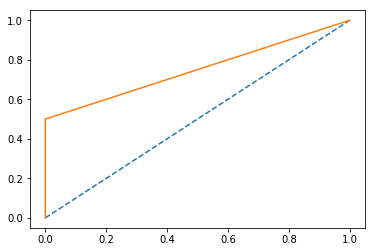

In [18]:
plt.plot([0,1],[0,1], '--')
plt.plot(fpr, tpr);

### Outra forma de calcular AUC

In [19]:
y_binary = np.where(y == 'cat', 1, 0)
y_binary

array([0, 0, 1, 1])

In [20]:
print('AUC', metrics.roc_auc_score(y_binary, y_score_cat))

AUC 0.75
